In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
%pip install geopandas
%pip install contextily
%pip install folium branca
%pip install folium.plugins
%pip install calplot

In [1]:
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster, HeatMap, HeatMapWithTime
import calplot

In [2]:
with zipfile.ZipFile("..\data\interim\ebirdSonora.zip") as z:
    with z.open("ebirdSonora.csv") as f:
        df = pd.read_csv(f)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_14760\1476483933.py:1: SyntaxWarning: invalid escape sequence '\d'
  with zipfile.ZipFile("..\data\interim\ebirdSonora.zip") as z:


# Descriptivo

In [10]:
df.head()

basisofrecord institutioncode collectioncode  catalognumber  \
0  HumanObservation             CLO          EBIRD  OBS1000397761   
1  HumanObservation             CLO          EBIRD  OBS1000397738   
2  HumanObservation             CLO          EBIRD  OBS1000397737   
3  HumanObservation             CLO          EBIRD  OBS1000397739   
4  HumanObservation             CLO          EBIRD  OBS1000397740   

                          occurrenceid   recordedby  year  month  day  \
0  URN:catalog:CLO:EBIRD:OBS1000397761  obsr1203672  2020     10   20   
1  URN:catalog:CLO:EBIRD:OBS1000397738  obsr1203672  2020     10   20   
2  URN:catalog:CLO:EBIRD:OBS1000397737  obsr1203672  2020     10   20   
3  URN:catalog:CLO:EBIRD:OBS1000397739  obsr1203672  2020     10   20   
4  URN:catalog:CLO:EBIRD:OBS1000397740  obsr1203672  2020     10   20   

  publishingcountry  ... class          order      family      genus  \
0                MX  ...  Aves  Columbiformes  Columbidae    Columba   
1                MX  ...  Aves  Passeriformes  Passeridae     Passer   
2                MX  ...  Aves  Passeriformes  Tyrannidae   Sayornis   
3                MX  ...  Aves  Columbiformes  Columbidae  Columbina   
4                MX  ...  Aves   Strigiformes   Strigidae     Athene   

   specificepithet      scientificname vernacularname taxonremarks  \
0            livia       Columba livia    Rock Pigeon          NaN   
1       domesticus   Passer domesticus  House Sparrow          NaN   
2             saya       Sayornis saya   Say's Phoebe          NaN   
3             inca      Columbina inca      Inca Dove          NaN   
4      cunicularia  Athene cunicularia  Burrowing Owl          NaN   

             taxonconceptid individualcount  
0  avibase-avibase-BBA263C2             1.0  
1  avibase-avibase-240E3390             1.0  
2  avibase-avibase-28669A3D             1.0  
3  avibase-avibase-BFE74235             1.0  
4  avibase-avibase-B9EE9676             1.0  

[5 rows x 28 columns]

In [ ]:
for col in df.columns:
    # print(col,'(',len(df[col].unique()),')')
    # [print(i) for i in df[col].unique()]
    # print(*df[col].unique())
    print(df[col].value_counts())
    print("Unicos", len(df[col].unique()))
    print("*" * 50)

basisofrecord
HumanObservation    862409
Name: count, dtype: int64
Unicos 1
**************************************************
institutioncode
CLO    862409
Name: count, dtype: int64
Unicos 1
**************************************************
collectioncode
EBIRD    862409
Name: count, dtype: int64
Unicos 1
**************************************************
catalognumber
OBS1021537345    1
OBS1000397761    1
OBS1000397738    1
OBS1000397737    1
OBS1000397739    1
                ..
OBS1000397751    1
OBS1000397750    1
OBS1000397747    1
OBS1000397746    1
OBS1000397745    1
Name: count, Length: 862409, dtype: int64
Unicos 862409
**************************************************
occurrenceid
URN:catalog:CLO:EBIRD:OBS1021537345    1
URN:catalog:CLO:EBIRD:OBS1000397761    1
URN:catalog:CLO:EBIRD:OBS1000397738    1
URN:catalog:CLO:EBIRD:OBS1000397737    1
URN:catalog:CLO:EBIRD:OBS1000397739    1
                                      ..
URN:catalog:CLO:EBIRD:OBS1000397751    1
URN:catalo

In [11]:
df.describe()

year          month            day  decimallatitude  \
count  862409.000000  862409.000000  862409.000000    862409.000000   
mean     2017.374238       6.570577      15.423820        28.722557   
std         8.059620       3.957056       8.471791         1.569332   
min      1887.000000       1.000000       1.000000        26.324192   
25%      2016.000000       3.000000       8.000000        27.103651   
50%      2019.000000       6.000000      15.000000        28.461292   
75%      2023.000000      11.000000      22.000000        29.183807   
max      2024.000000      12.000000      31.000000        32.491627   

       decimallongitude  taxonremarks  individualcount  
count     862409.000000           0.0    797235.000000  
mean        -110.767048           NaN        11.208622  
std            1.652004           NaN        93.953202  
min         -115.052444           NaN         1.000000  
25%         -111.453415           NaN         1.000000  
50%         -110.927080           NaN         2.000000  
75%         -109.083595           NaN         5.000000  
max         -108.518930           NaN     18570.000000

In [ ]:
df.describe(include="object")

basisofrecord institutioncode collectioncode  catalognumber  \
count             862409          862409         862409         862409   
unique                 1               1              1         862409   
top     HumanObservation             CLO          EBIRD  OBS1021537345   
freq              862409          862409         862409              1   

                               occurrenceid   recordedby publishingcountry  \
count                                862409       862409            862409   
unique                               862409         2191                 1   
top     URN:catalog:CLO:EBIRD:OBS1021537345  obsr1203672                MX   
freq                                      1        49396            862409   

       country stateprovince      county  ...   kingdom    phylum   class  \
count   862409        862409      862401  ...    862409    862409  862409   
unique       1             1          71  ...         1         1       1   
top     Mexico        Sonora  Hermosillo  ...  Animalia  Chordata    Aves   
freq    862409        862409      229734  ...    862409    862409  862409   

                order      family    genus specificepithet  scientificname  \
count          862409      862409   862409          862409          862409   
unique             25          77      282             475             545   
top     Passeriformes  Columbidae  Zenaida       mexicanus  Cathartes aura   
freq           383122       69574    30433           35030           19101   

        vernacularname            taxonconceptid  
count           862409                    862409  
unique             545                       545  
top     Turkey Vulture  avibase-avibase-36B3872D  
freq             19101                     19101  

[4 rows x 21 columns]

In [21]:
df.isna().sum()

basisofrecord             0
institutioncode           0
collectioncode            0
catalognumber             0
occurrenceid              0
recordedby                0
year                      0
month                     0
day                       0
publishingcountry         0
country                   0
stateprovince             0
county                    8
decimallatitude           0
decimallongitude          0
locality                  0
kingdom                   0
phylum                    0
class                     0
order                     0
family                    0
genus                     0
specificepithet           0
scientificname            0
vernacularname            0
taxonremarks         862409
taxonconceptid            0
individualcount           0
dtype: int64

# Correccion

In [3]:
df[df["county"].isna()][
    ["decimallatitude", "decimallongitude"]
]  # Parece ser de una sub isla del tiburon

decimallatitude  decimallongitude
305363        28.718594        -112.29452
305364        28.718594        -112.29452
305365        28.718594        -112.29452
305366        28.718594        -112.29452
305367        28.718594        -112.29452
305368        28.718594        -112.29452
305369        28.718594        -112.29452
305370        28.718594        -112.29452

In [4]:
df["individualcount"] = df["individualcount"].fillna(1)

In [5]:
df["fecha"] = pd.to_datetime(df[["year", "month", "day"]])
df["fecha"].describe()

count                           862409
mean     2017-11-16 14:27:12.614686976
min                1887-03-31 00:00:00
25%                2016-03-06 00:00:00
50%                2019-12-14 00:00:00
75%                2023-01-11 00:00:00
max                2024-12-31 00:00:00
Name: fecha, dtype: object

In [6]:
df = df[df["fecha"] >= "1940-01-01"]
df["fecha"].describe()

count                           862329
mean     2017-11-19 14:49:29.618324736
min                1952-11-01 00:00:00
25%                2016-03-06 00:00:00
50%                2019-12-14 00:00:00
75%                2023-01-11 00:00:00
max                2024-12-31 00:00:00
Name: fecha, dtype: object

## eliminar columnas redundantes

In [7]:
df = df.drop(
    columns=[
        "basisofrecord",
        "institutioncode",
        "collectioncode",
        "catalognumber",
        "occurrenceid",
        "publishingcountry",
        "country",
        "stateprovince",
        "kingdom",
        "phylum",
        "class",
        "scientificname",
        "taxonconceptid",
        "taxonremarks",
    ]
)
df.head()

recordedby  year  month  day      county  decimallatitude  \
0  obsr1203672  2020     10   20  Hermosillo        29.061197   
1  obsr1203672  2020     10   20  Hermosillo        29.061197   
2  obsr1203672  2020     10   20  Hermosillo        29.061197   
3  obsr1203672  2020     10   20  Hermosillo        29.061197   
4  obsr1203672  2020     10   20  Hermosillo        29.061197   

   decimallongitude               locality          order      family  \
0       -110.941956  Cerro de la Cementera  Columbiformes  Columbidae   
1       -110.941956  Cerro de la Cementera  Passeriformes  Passeridae   
2       -110.941956  Cerro de la Cementera  Passeriformes  Tyrannidae   
3       -110.941956  Cerro de la Cementera  Columbiformes  Columbidae   
4       -110.941956  Cerro de la Cementera   Strigiformes   Strigidae   

       genus specificepithet vernacularname  individualcount      fecha  
0    Columba           livia    Rock Pigeon              1.0 2020-10-20  
1     Passer      domesticus  House Sparrow              1.0 2020-10-20  
2   Sayornis            saya   Say's Phoebe              1.0 2020-10-20  
3  Columbina            inca      Inca Dove              1.0 2020-10-20  
4     Athene     cunicularia  Burrowing Owl              1.0 2020-10-20

# EDA

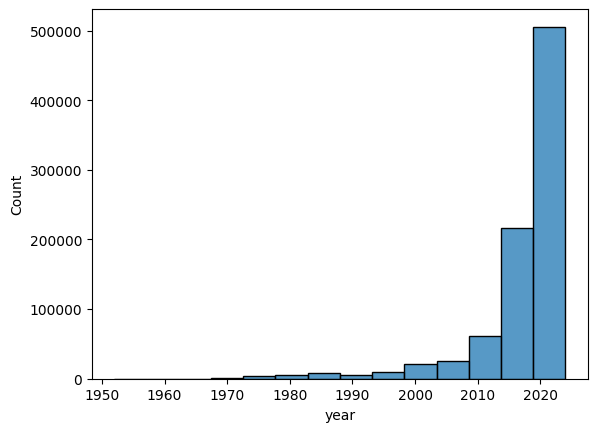

In [ ]:
sns.histplot(data=df, x="year", binwidth=5);

In [ ]:
top_municipios = (
    df.groupby("county")
    .count()[["individualcount"]]
    .sort_values("individualcount", ascending=False)
    .head(10)
    .index.to_list()
)
[print(i) for i in top_municipios];

Hermosillo
Alamos
Guaymas
Puerto Peñasco
San Luis Río Colorado
Huatabampo
Onavas
Yécora
Imuris
Agua Prieta


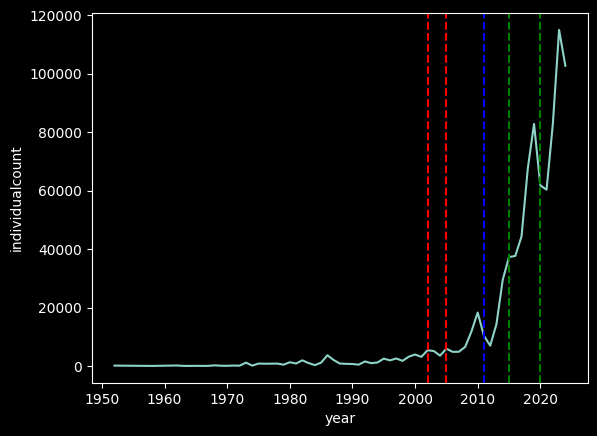

In [ ]:
sns.lineplot(
    data=df.groupby("year").count()[["individualcount"]], x="year", y="individualcount"
)
plt.axvline(x=2002, color="red", linestyle="--")
plt.axvline(x=2005, color="red", linestyle="--")
plt.axvline(x=2011, color="blue", linestyle="--")
plt.axvline(x=2015, color="green", linestyle="--")
plt.axvline(x=2020, color="green", linestyle="--");

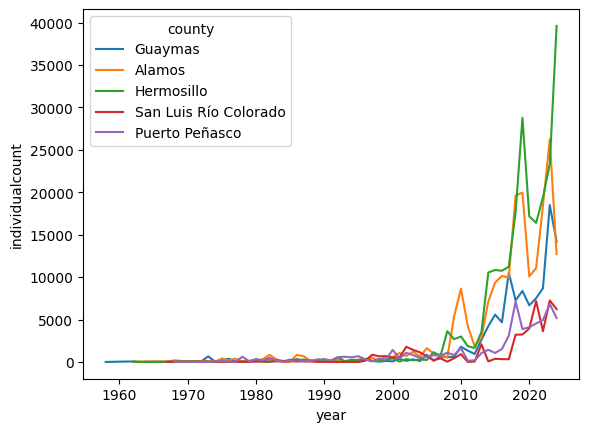

In [ ]:
observations_by_year_municipio = (
    df[df["county"].isin(top_municipios)]
    .groupby(["year", "county"])
    .count()[["individualcount"]]
    .reset_index()
)
sns.lineplot(
    data=observations_by_year_municipio, x="year", y="individualcount", hue="county"
);

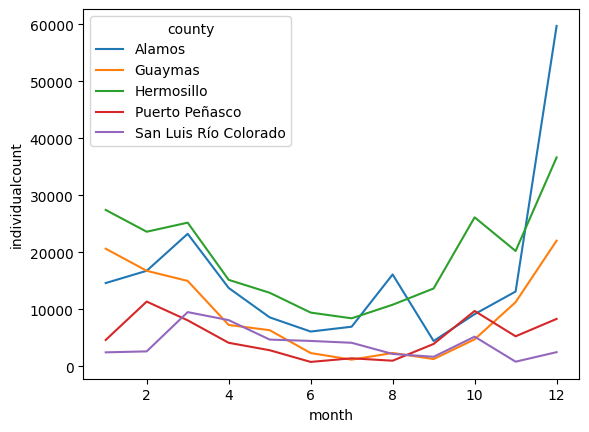

In [ ]:
observations_by_year = (
    df[df["county"].isin(top_municipios)]
    .groupby(["month", "county"])
    .count()[["individualcount"]]
    .reset_index()
)
sns.lineplot(data=observations_by_year, x="month", y="individualcount", hue="county");

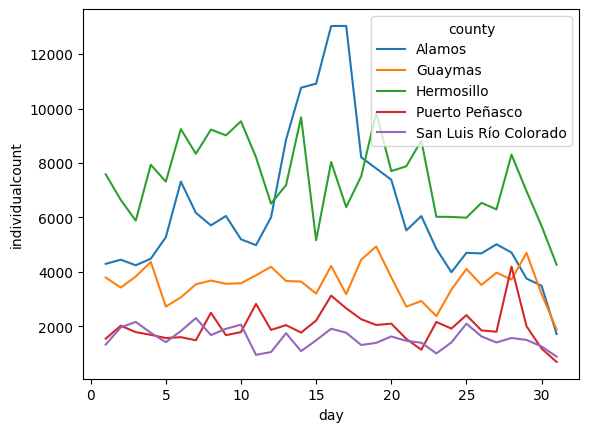

In [ ]:
observations_by_year = (
    df[df["county"].isin(top_municipios)]
    .groupby(["day", "county"])
    .count()[["individualcount"]]
    .reset_index()
)
sns.lineplot(data=observations_by_year, x="day", y="individualcount", hue="county");

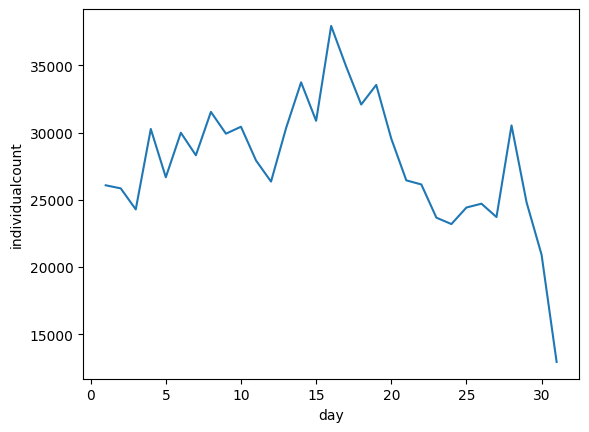

In [ ]:
observations_by_year = df.groupby("day").count()[["individualcount"]]
sns.lineplot(data=observations_by_year, x="day", y="individualcount");

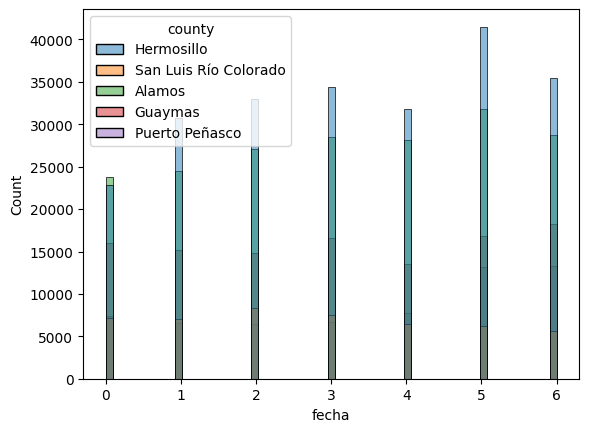

In [ ]:
sns.histplot(
    data=df[df["county"].isin(top_municipios)], x=df.fecha.dt.day_of_week, hue="county"
);

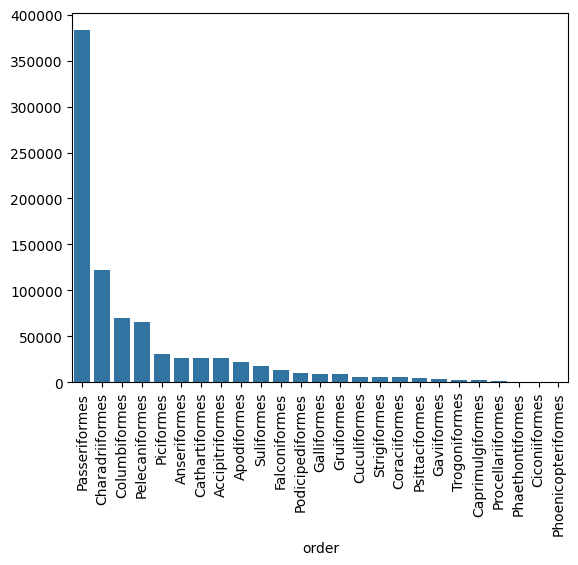

In [ ]:
sns.barplot(data=df.groupby("order").size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

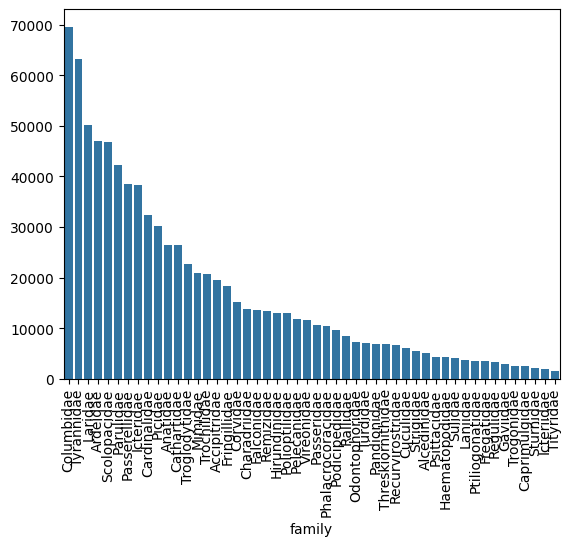

In [ ]:
sns.barplot(data=df.groupby("family").size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

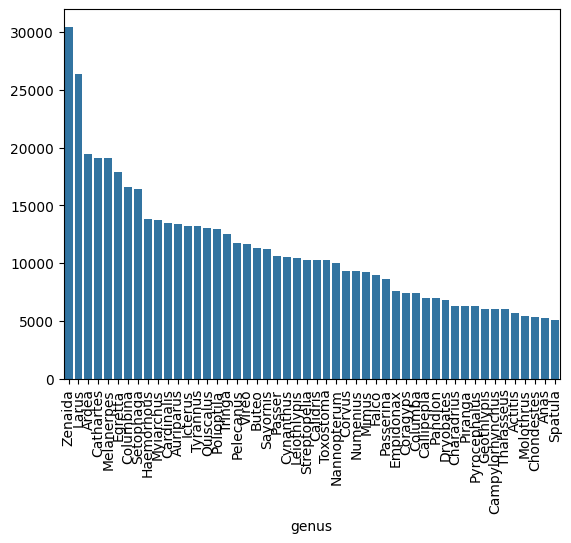

In [ ]:
sns.barplot(data=df.groupby("genus").size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

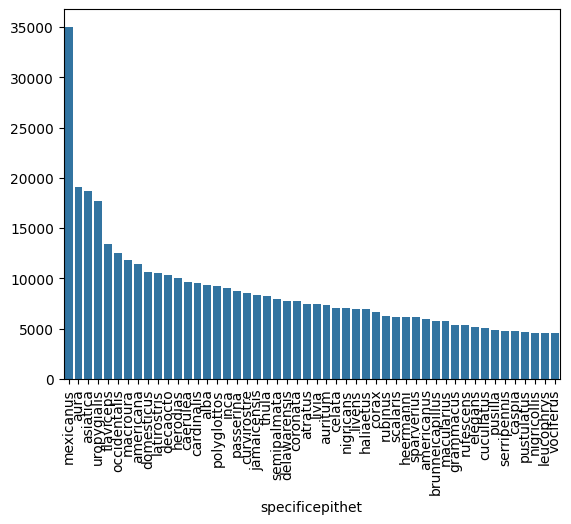

In [ ]:
sns.barplot(
    data=df.groupby("specificepithet").size().sort_values(ascending=False).head(50)
)
plt.xticks(rotation=90);

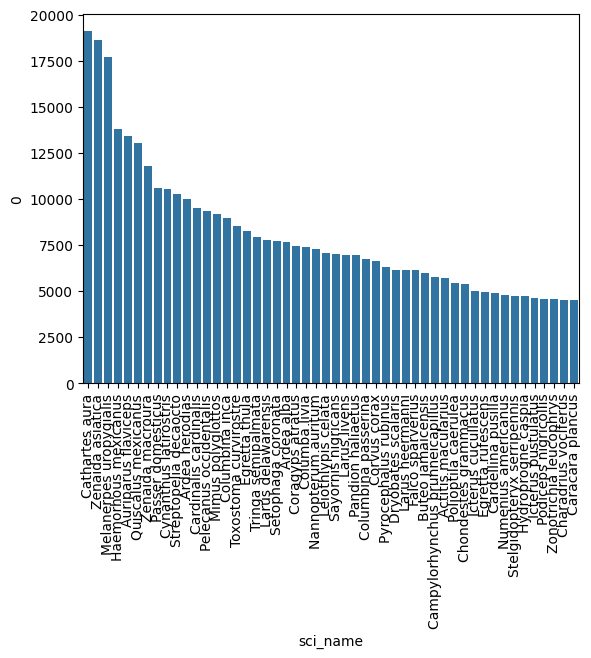

In [ ]:
temp_df = (
    df.groupby(["genus", "specificepithet"])
    .size()
    .sort_values(ascending=False)
    .head(50)
    .reset_index()
)
temp_df["sci_name"] = temp_df["genus"] + " " + temp_df["specificepithet"]
temp_df = temp_df.drop(columns=["genus", "specificepithet"])
temp_df = temp_df.set_index("sci_name")
sns.barplot(data=temp_df[0])
plt.xticks(rotation=90);

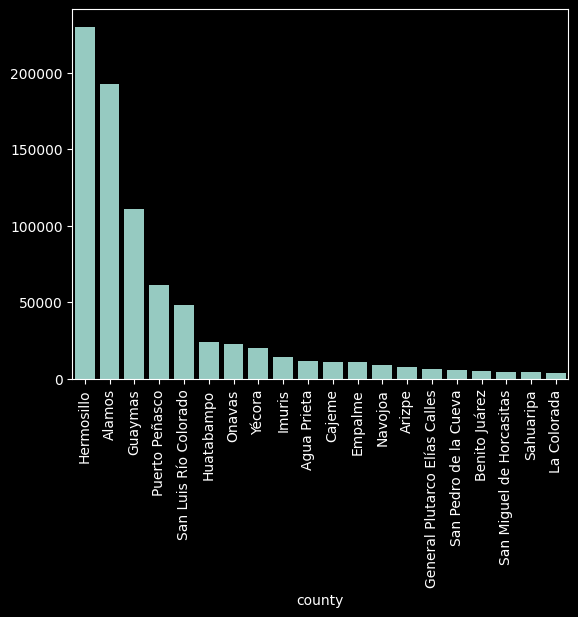

In [154]:
sns.barplot(data=df.groupby("county").size().sort_values(ascending=False).head(20))
plt.xticks(rotation=90);

## Calendar heatmap

In [ ]:
df.groupby("fecha")["individualcount"].sum().describe()

count     6806.000000
mean      1322.506759
std       3365.447753
min          1.000000
25%         57.000000
50%        360.000000
75%       1268.750000
max      93683.000000
Name: individualcount, dtype: float64

<Axes: xlabel='fecha', ylabel='individualcount'>

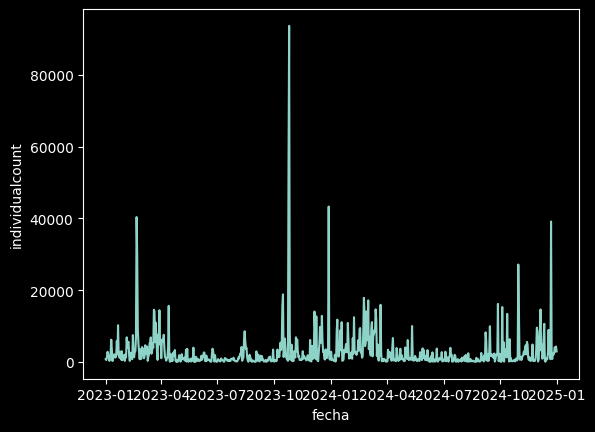

In [ ]:
sns.lineplot(
    df[df["year"] > 2022].groupby("fecha")["individualcount"].sum().reset_index(),
    x="fecha",
    y="individualcount",
)

<Axes: xlabel='fecha', ylabel='individualcount'>

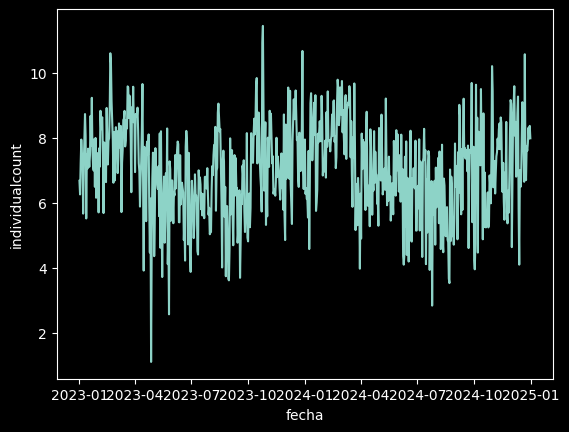

In [ ]:
sns.lineplot(np.log(df[df["year"] > 2022].groupby("fecha")["individualcount"].sum()))

In [ ]:
observaciones_diarias = df.groupby("fecha")["individualcount"].count()
observaciones_diarias_logaritmo = np.log(observaciones_diarias)
observaciones_diarias_logaritmo.describe()

count    6806.000000
mean        3.921814
std         1.559690
min         0.000000
25%         3.091042
50%         4.110874
75%         5.003946
max         8.025843
Name: individualcount, dtype: float64

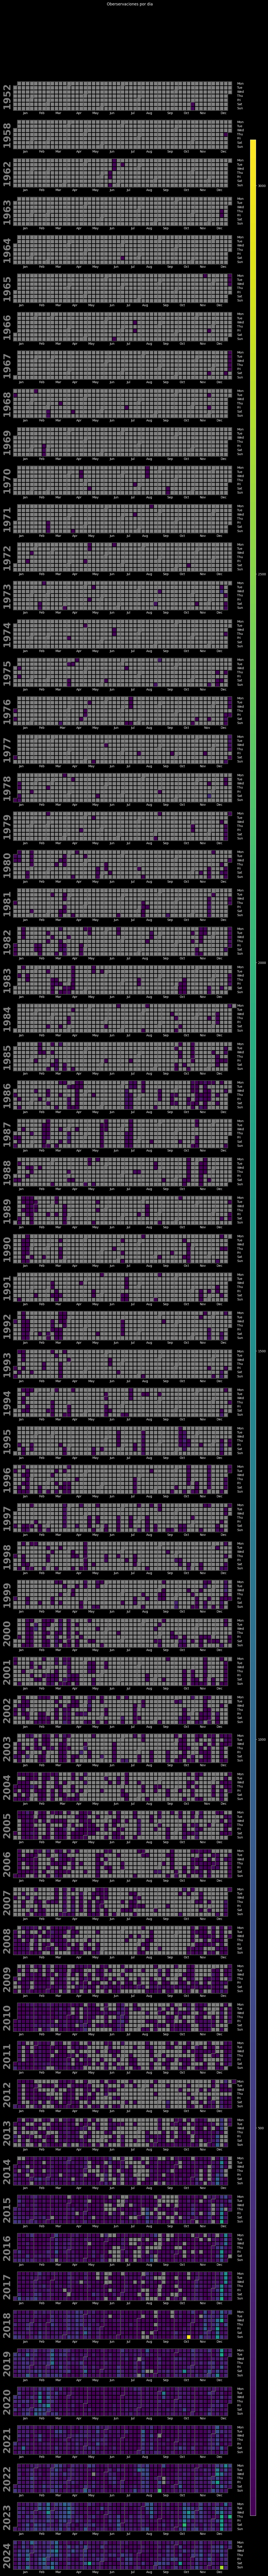

In [ ]:
calplot.calplot(
    observaciones_diarias,
    cmap="viridis",
    colorbar=True,
    fillcolor="gray",
    suptitle="Oberservaciones por dia",
    yearlabel_kws={"fontname": "sans-serif"},
);

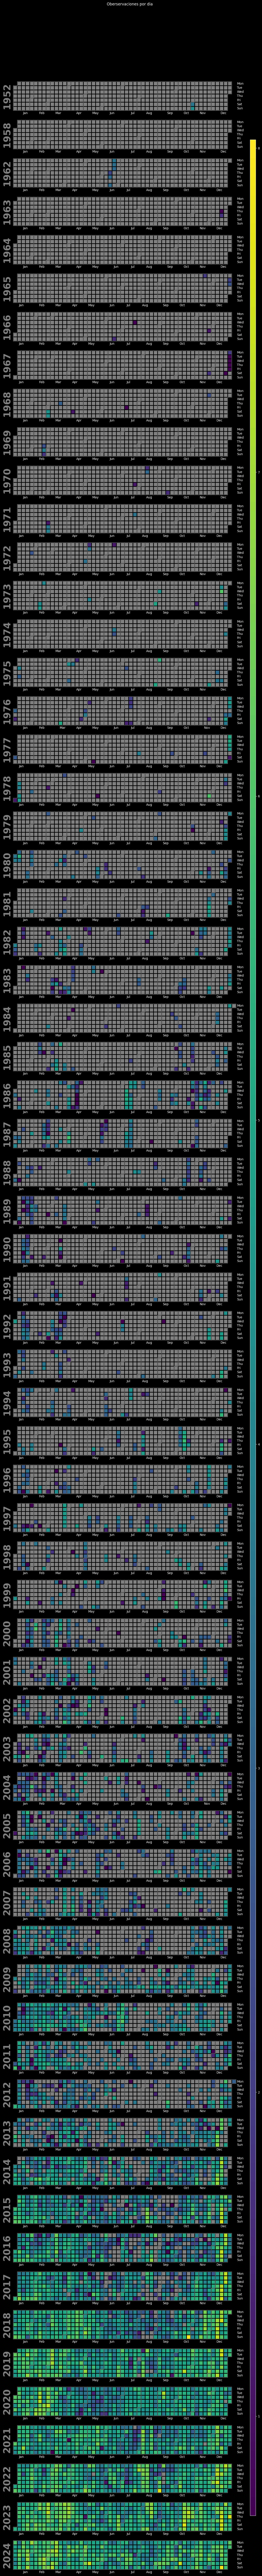

In [ ]:
calplot.calplot(
    observaciones_diarias_logaritmo,
    cmap="viridis",
    colorbar=True,
    fillcolor="gray",
    suptitle="Oberservaciones por dia",
    yearlabel_kws={"fontname": "sans-serif"},
);

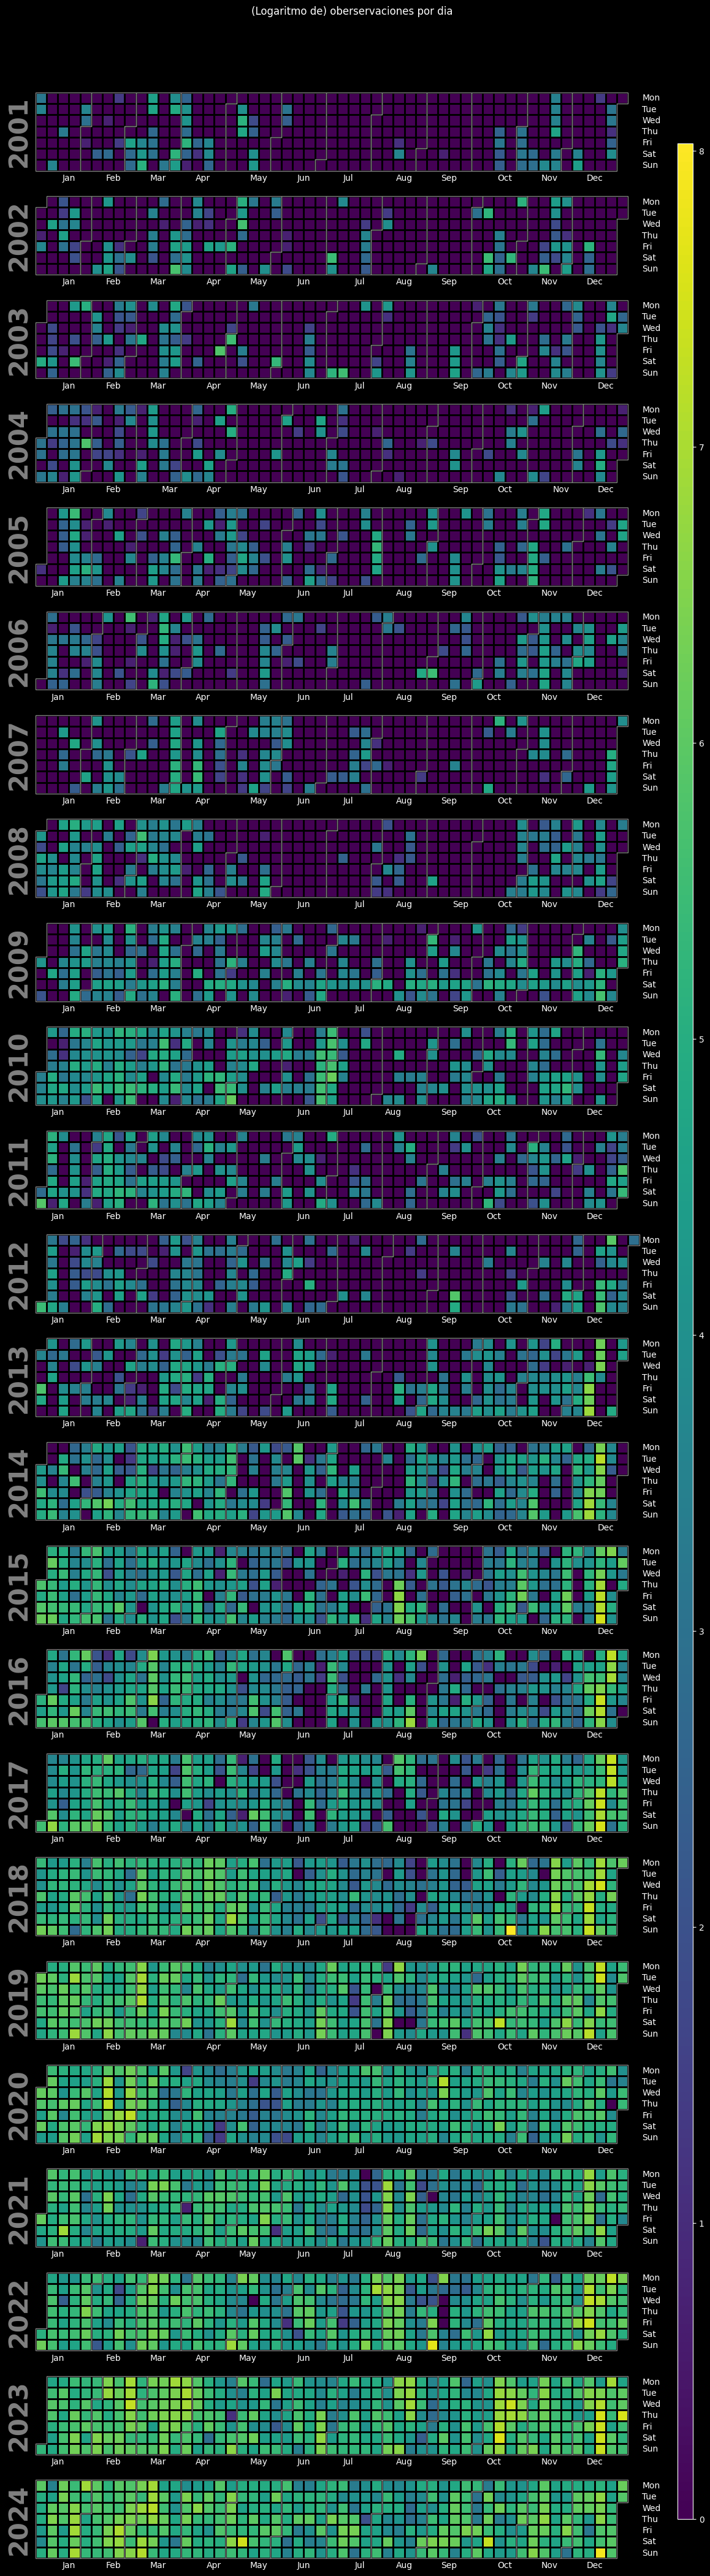

In [ ]:
calplot.calplot(
    np.log(df[df["year"] > 2000].groupby("fecha")["individualcount"].count()),
    cmap="viridis",
    colorbar=True,
    fillcolor="gray",
    suptitle="(Logaritmo de) oberservaciones por dia",
    yearlabel_kws={"fontname": "sans-serif"},
);

Estos resultados se alinean con el timeline de eBird segun [un anuncio reciente en su blog](https://ebird.org/news/ebird-20th-anniversary
):
- **2002** eBird is launched with a simple idea: “Record any bird you see, from anywhere and any time, then explore where the birds are!”
- **2005** Version 2 of the eBird website premieres with the slogan “eBird: where bird is the word.”
- **2011** eBird goes global with the ability to enter and explore bird observations from anywhere in the world, and introduces some of our most popular birding tools including Alerts, Top100, and improved range maps.
- **2015** Built off the successes of BirdLog, eBird launches eBird Mobile—the first 100% free app that allows quick and easy eBird data entry directly from the field.
- **2020** To better serve the growing number of eBirders, we migrated the entire eBird database to a new management system.

## Usuarios

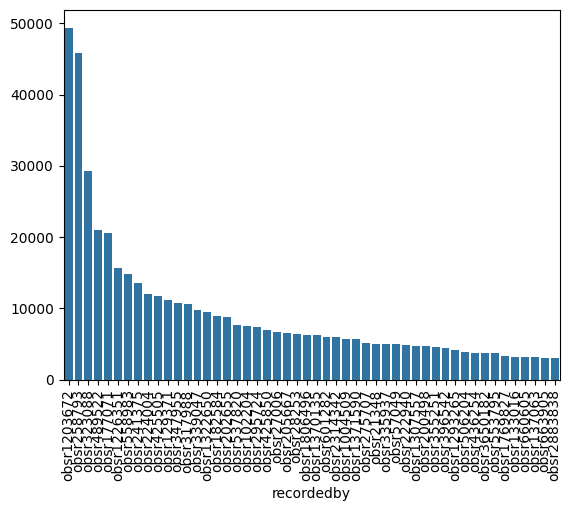

In [ ]:
sns.barplot(data=df.groupby("recordedby").size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

In [20]:
top_usuarios = (
    df.groupby("recordedby")
    .count()[["individualcount"]]
    .sort_values("individualcount", ascending=False)
    .head(20)
    .index.to_list()
)
[print(i) for i in top_usuarios];

obsr1203672
obsr258793
obsr323088
obsr489522
obsr177071
obsr1226351
obsr558983
obsr241375
obsr224004
obsr425505
obsr129371
obsr347955
obsr317988
obsr339047
obsr1322650
obsr182584
obsr202655
obsr537820
obsr102204
obsr295724


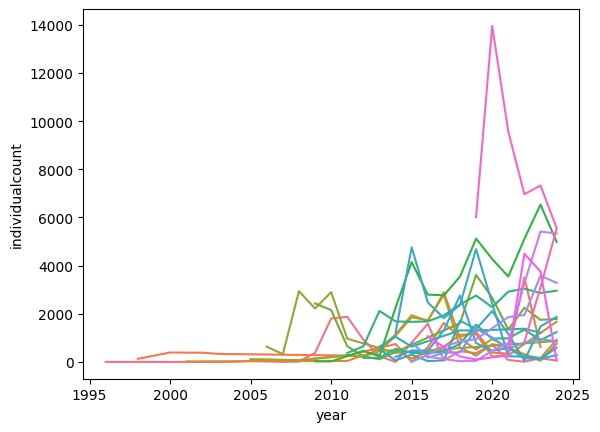

In [ ]:
observations_by_user = (
    df[df["recordedby"].isin(top_usuarios)]
    .groupby(["year", "recordedby"])
    .count()[["individualcount"]]
    .reset_index()
)
sns.lineplot(
    data=observations_by_user,
    x="year",
    y="individualcount",
    hue="recordedby",
    legend=False,
);

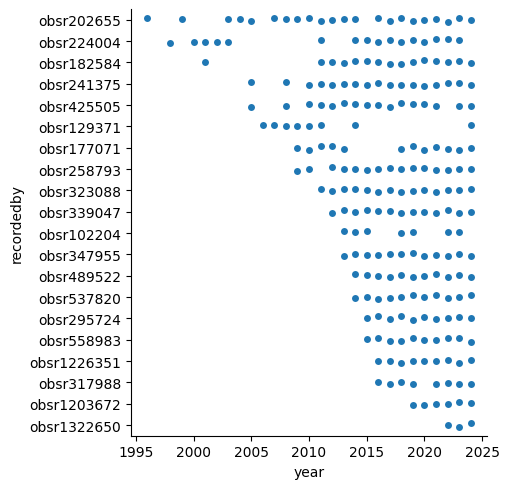

In [ ]:
sns.catplot(data=observations_by_user, x="year", y="recordedby")

C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2864375084.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df[df['recordedby'].isin(top_usuarios)][df['county'].isin(top_municipios)],x='county',y='recordedby',binwidth=[1,1])


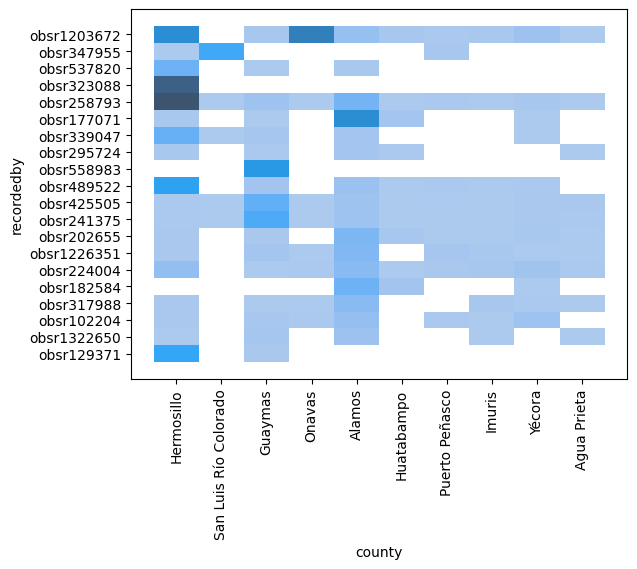

In [ ]:
sns.histplot(
    data=df[df["recordedby"].isin(top_usuarios)][df["county"].isin(top_municipios)],
    x="county",
    y="recordedby",
    binwidth=[1, 1],
)
plt.xticks(rotation=90);

In [ ]:
users_df = (
    df.groupby("recordedby")
    .agg(
        {
            "county": pd.Series.nunique,
            "vernacularname": pd.Series.nunique,
            "individualcount": sum,
            "fecha": [min, max],
            "month": pd.Series.mode,
            "day": pd.Series.mode,
            "locality": pd.Series.count,
        }
    )
    .sort_values(("locality", "count"), ascending=False)
)
users_df.head(20)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2894148279.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  users_df = df.groupby('recordedby').agg({'county':pd.Series.nunique\
C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2894148279.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  users_df = df.groupby('recordedby').agg({'county':pd.Series.nunique\
C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2894148279.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavio

county vernacularname individualcount      fecha             \
            nunique        nunique             sum        min        max   
recordedby                                                                 
obsr1203672      44            435        328220.0 2019-01-26 2024-12-31   
obsr258793       47            429        363279.0 2009-06-06 2024-12-31   
obsr323088        2            143        871547.0 2011-03-04 2024-12-18   
obsr489522       38            381        172632.0 2014-02-15 2024-12-26   
obsr177071       12            360         87935.0 2009-02-27 2024-12-28   
obsr1226351      33            399        103788.0 2016-12-11 2024-11-09   
obsr558983        3            261         57321.0 2015-12-14 2024-12-30   
obsr241375       36            367         86846.0 2005-12-27 2024-04-04   
obsr224004       28            370         60263.0 1998-10-02 2023-03-09   
obsr425505       26            363         80502.0 2005-12-27 2024-03-02   
obsr129371        5            248        415299.0 2006-10-13 2024-06-07   
obsr347955        6            239        260387.0 2013-03-22 2024-12-28   
obsr317988       43            360         40836.0 2016-03-19 2024-04-17   
obsr339047       12            353         92620.0 2012-10-20 2024-12-28   
obsr1322650      23            340         53687.0 2022-12-05 2024-11-09   
obsr182584        6            338         71629.0 2001-12-27 2024-12-21   
obsr202655       23            419         67113.0 1996-11-09 2024-12-17   
obsr537820        9            243         49589.0 2014-06-07 2024-12-29   
obsr102204       24            360         46830.0 2013-12-13 2023-08-09   
obsr295724       18            337         69550.0 2015-01-28 2024-07-04   

            month      day locality  
             mode     mode    count  
recordedby                           
obsr1203672    12        4    49396  
obsr258793     12       17    45825  
obsr323088      1       10    29307  
obsr489522      1        1    20932  
obsr177071     12       16    20598  
obsr1226351     9        4    15686  
obsr558983     12       18    14814  
obsr241375     12       16    13509  
obsr224004      3        8    12020  
obsr425505     12       16    11798  
obsr129371      3       28    11229  
obsr347955      4  [7, 25]    10743  
obsr317988     12       24    10602  
obsr339047     12       17     9803  
obsr1322650     7       19     9456  
obsr182584     12        5     8874  
obsr202655      2       21     8792  
obsr537820     12       18     7616  
obsr102204      8       12     7521  
obsr295724      1        8     7324

In [ ]:
users_df["rango"] = (users_df["fecha"]["max"] - users_df["fecha"]["min"]).dt.days
users_df["individuos_por_especie"] = (
    users_df["individualcount"]["sum"] / users_df["vernacularname"]["nunique"]
)
users_df["observaciones_por_dia"] = users_df["locality"]["count"] / users_df["rango"]
users_df.head()

county vernacularname individualcount      fecha             \
            nunique        nunique             sum        min        max   
recordedby                                                                 
obsr1203672      44            435        328220.0 2019-01-26 2024-12-31   
obsr258793       47            429        363279.0 2009-06-06 2024-12-31   
obsr323088        2            143        871547.0 2011-03-04 2024-12-18   
obsr489522       38            381        172632.0 2014-02-15 2024-12-26   
obsr177071       12            360         87935.0 2009-02-27 2024-12-28   

            month  day locality rango individuos_por_especie  \
             mode mode    count                                
recordedby                                                     
obsr1203672    12    4    49396  2166             754.528736   
obsr258793     12   17    45825  5687             846.804196   
obsr323088      1   10    29307  5038            6094.734266   
obsr489522      1    1    20932  3967             453.102362   
obsr177071     12   16    20598  5783             244.263889   

            observaciones_por_dia  
                                   
recordedby                         
obsr1203672             22.805171  
obsr258793               8.057851  
obsr323088               5.817189  
obsr489522               5.276531  
obsr177071               3.561819

<Axes: xlabel='observaciones_por_dia', ylabel='individuos_por_especie'>

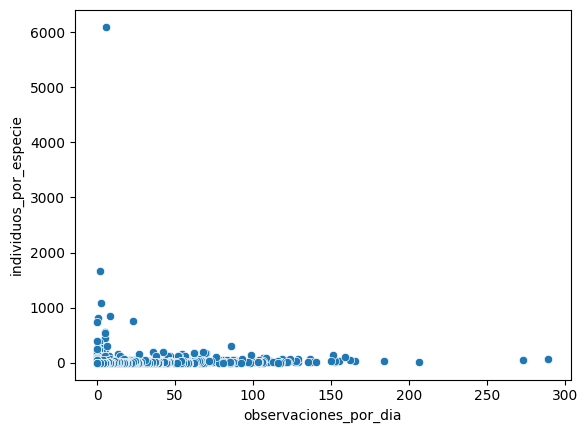

In [ ]:
sns.scatterplot(data=users_df, x="observaciones_por_dia", y="individuos_por_especie")

<Axes: xlabel='count', ylabel='nunique'>

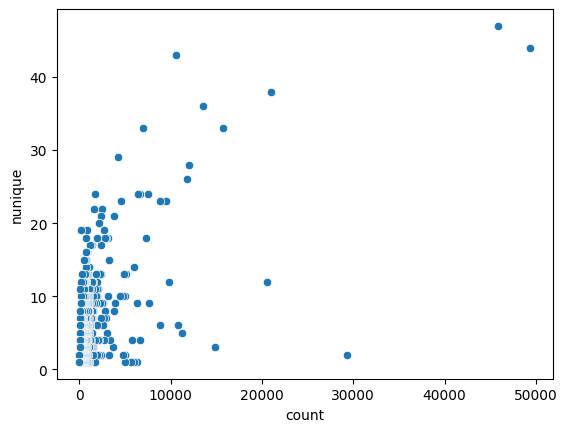

In [ ]:
sns.scatterplot(
    data=users_df, x=users_df["locality"]["count"], y=users_df["county"]["nunique"]
)

<Axes: xlabel='nunique', ylabel='nunique'>

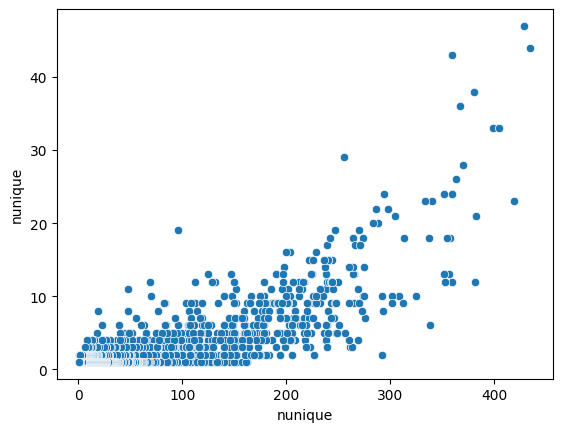

In [ ]:
sns.scatterplot(
    data=users_df,
    x=users_df["vernacularname"]["nunique"],
    y=users_df["county"]["nunique"],
)

<Axes: xlabel='nunique', ylabel='sum'>

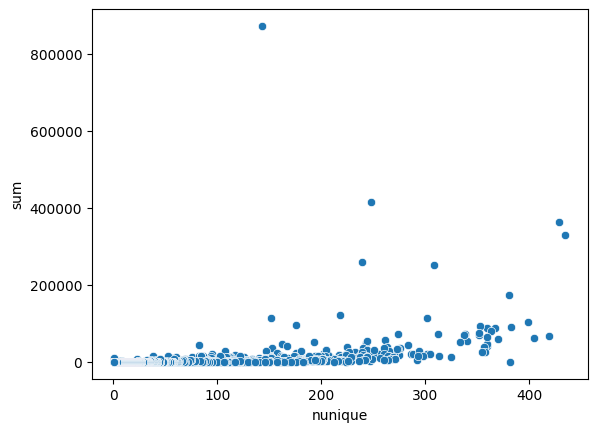

In [ ]:
sns.scatterplot(
    data=users_df,
    x=users_df["vernacularname"]["nunique"],
    y=users_df["individualcount"]["sum"],
)

<Axes: xlabel='nunique', ylabel='rango'>

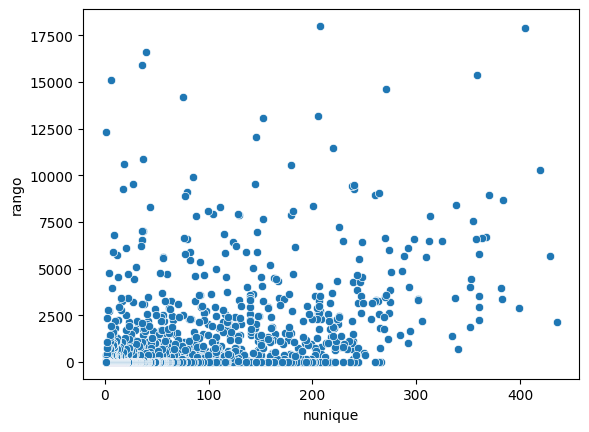

In [ ]:
sns.scatterplot(data=users_df, x=users_df["vernacularname"]["nunique"], y="rango")

## Especies

In [ ]:
especies_por_usuario = (
    df.groupby(["recordedby", "vernacularname"])["individualcount"].sum().reset_index()
)
especies_por_usuario[especies_por_usuario["recordedby"].isin(top_usuarios)].head()

recordedby     vernacularname  individualcount
2267  obsr102204   Acorn Woodpecker            228.0
2268  obsr102204    American Avocet             57.0
2269  obsr102204  American Barn Owl              2.0
2270  obsr102204      American Coot            194.0
2271  obsr102204   American Goshawk              1.0

In [ ]:
df.groupby("vernacularname")["recordedby"].size().sort_values(ascending=False).head()

vernacularname
Turkey Vulture       19101
White-winged Dove    18649
Gila Woodpecker      17692
House Finch          13830
Verdin               13423
Name: recordedby, dtype: int64

2188

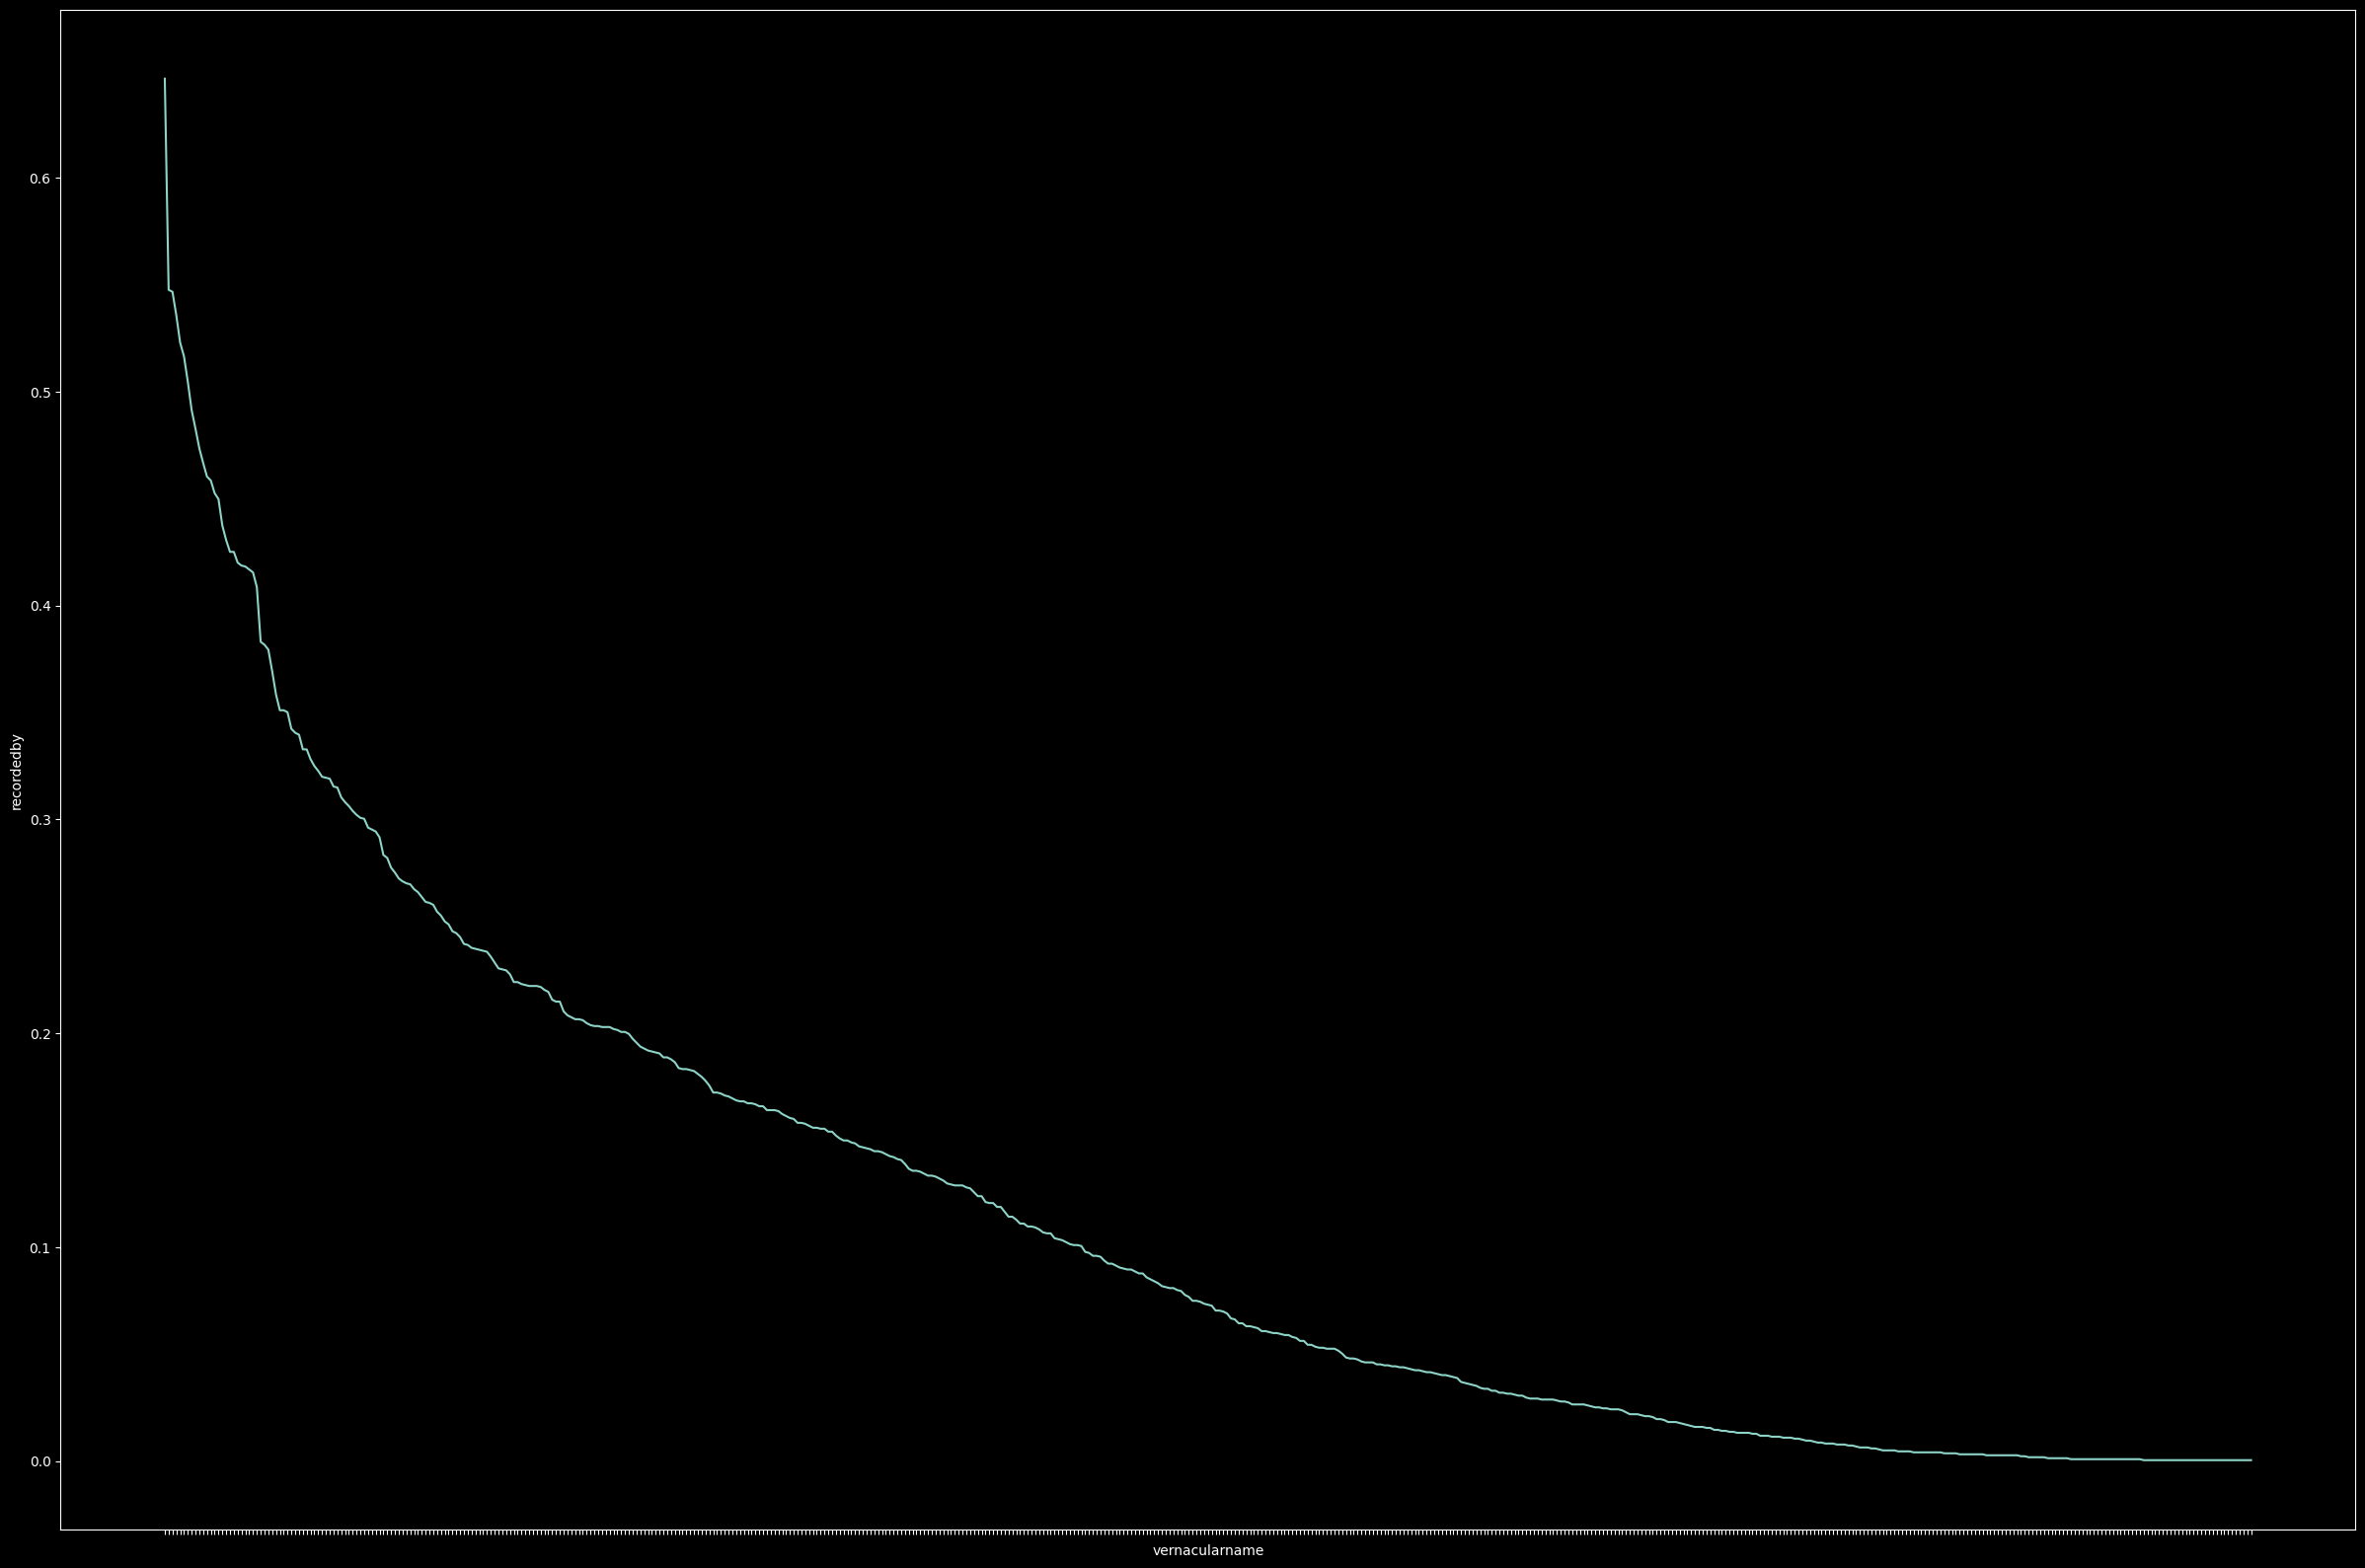

In [ ]:
f, ax = plt.subplots(figsize=(30, 20))
sns.lineplot(
    df.groupby("vernacularname")["recordedby"].nunique().sort_values(ascending=False)
    / df["recordedby"].nunique(),
    ax=ax,
)
ax.set(xticklabels=[]);

In [ ]:
df_especies = df.groupby("vernacularname").agg(
    {"recordedby": pd.Series.nunique, "individualcount": pd.Series.count}
)
df_especies.describe()

recordedby  individualcount
count   545.000000       545.000000
mean    254.359633      1582.255046
std     272.049795      2576.587325
min       1.000000         1.000000
25%      30.000000        45.000000
50%     160.000000       489.000000
75%     401.000000      2002.000000
max    1414.000000     19101.000000

Text(0.5, 1.0, 'Observaciones de especie por usuarios')

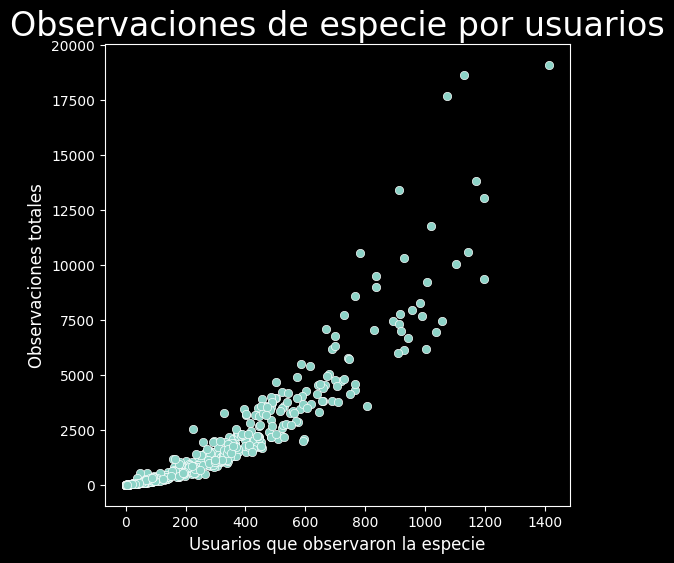

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=df_especies, x="recordedby", y="individualcount")
ax.set_xlabel("Usuarios que observaron la especie", size=12)

# Set label for y-axis
ax.set_ylabel("Observaciones totales", size=12)

# Set title for plot
ax.set_title("Observaciones de especie por usuarios", size=24)

In [ ]:
df_especies[df_especies["recordedby"] < 10].sort_values("recordedby", ascending=False)

recordedby  individualcount
vernacularname                                         
Black-legged Kittiwake               9             14.0
Chestnut-collared Longspur           9            364.0
Piping Plover                        9             14.0
Tennessee Warbler                    9             10.0
Short-billed Gull                    9             11.0
...                                ...              ...
Upland Sandpiper                     1              1.0
White Wagtail                        1              1.0
Varied Thrush                        1              1.0
White-rumped Sandpiper               1              1.0
Winter Wren                          1              1.0

[89 rows x 2 columns]

In [ ]:
rare_especies = (
    df_especies[df_especies["recordedby"] < 5]
    .sort_values("recordedby", ascending=False)
    .index.to_list()
)
len(rare_especies)

59

<Axes: xlabel='vernacularname', ylabel='recordedby'>

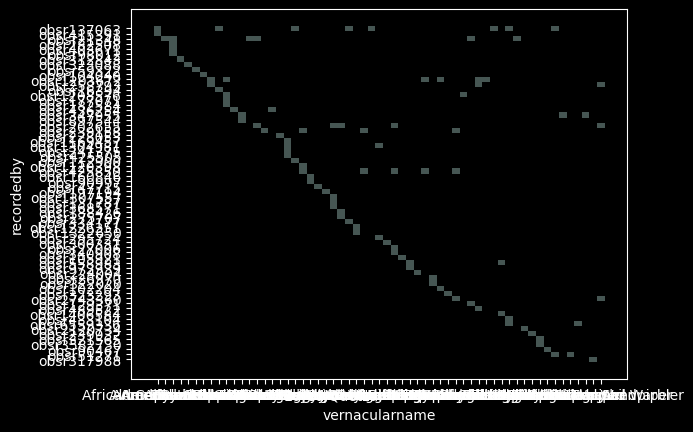

In [ ]:
rare_observations = (
    df[df["vernacularname"].isin(rare_especies)]
    .groupby(["vernacularname", "recordedby"])["individualcount"]
    .count()
    .reset_index()
)
sns.histplot(data=rare_observations, x="vernacularname", y="recordedby")

<Axes: xlabel='vernacularname', ylabel='recordedby'>

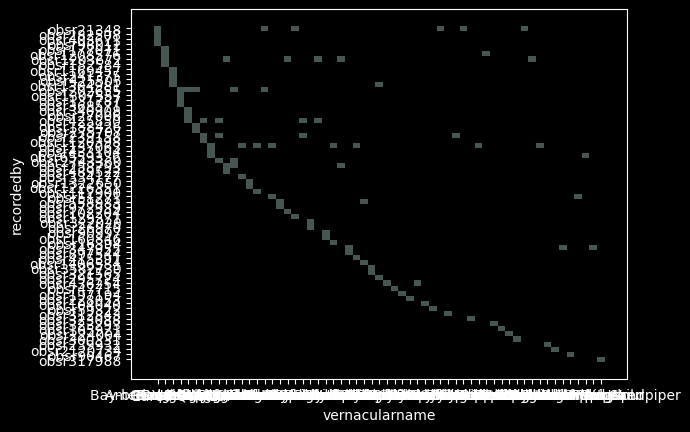

In [ ]:
rare_observations["especie"] = pd.Categorical(
    rare_observations["vernacularname"], categories=rare_especies, ordered=True
)
sns.histplot(
    data=rare_observations.sort_values("especie"), x="vernacularname", y="recordedby"
)

In [ ]:
species_user_counts = df.groupby("vernacularname")["recordedby"].nunique()
df["rarity"] = 1 / species_user_counts[df["vernacularname"]].values

user_scores = df.groupby("recordedby")["rarity"].mean().sort_values(ascending=False)

user_scores.head(20)

recordedby
obsr6559336    0.119897
obsr3063808    0.111111
obsr2120734    0.055831
obsr196052     0.049412
obsr239932     0.029623
obsr105921     0.027752
obsr1663700    0.025653
obsr403671     0.024789
obsr59322      0.024518
obsr905446     0.023810
obsr51271      0.015403
obsr419586     0.014706
obsr239797     0.014286
obsr398985     0.013001
obsr57626      0.012547
obsr1136416    0.012501
obsr339465     0.011236
obsr205067     0.010417
obsr26970      0.010130
obsr300331     0.009250
Name: rarity, dtype: float64

<Axes: xlabel='recordedby', ylabel='rarity'>

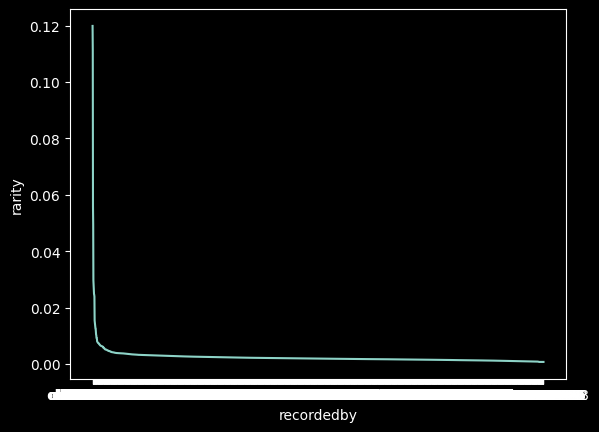

In [50]:
sns.lineplot(data=user_scores)

# Agrupamiento

In [ ]:
np.log(df["individualcount"])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
862404    2.302585
862405    1.386294
862406    0.000000
862407    2.708050
862408    0.000000
Name: individualcount, Length: 862409, dtype: float64

In [ ]:
presas_year = df.groupby(["locality", "year"]).agg(
    {"scientificname": pd.Series.nunique, "individualcount": sum}
)
presas_year.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3223081978.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})


scientificname  \
locality                                           year                   
 Real del Alamito                                  2016               1   
"El Oasis", Sonora Mexico                          1986              13   
                                                   1987               9   
#2200 Sebastián Lerdo de Tejada, San Luis Río C... 2024               1   
#39 solimar San Carlos                             2015              46   

                                                         individualcount  
locality                                           year                   
 Real del Alamito                                  2016              3.0  
"El Oasis", Sonora Mexico                          1986             56.0  
                                                   1987             11.0  
#2200 Sebastián Lerdo de Tejada, San Luis Río C... 2024             70.0  
#39 solimar San Carlos                             2015            277.0

In [ ]:
presas_especies = df.groupby(["locality"]).agg(
    {
        "year": pd.Series.nunique,
        "scientificname": pd.Series.nunique,
        "individualcount": sum,
    }
)
presas_especies.describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3550804156.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})


year  scientificname  individualcount
count  11623.000000    11623.000000     11623.000000
mean       1.476125       15.903639       768.812355
std        2.124160       23.672183      8683.294649
min        1.000000        1.000000         0.000000
25%        1.000000        2.000000         5.000000
50%        1.000000        8.000000        29.000000
75%        1.000000       20.000000       126.000000
max       42.000000      260.000000    407977.000000

In [ ]:
presas_especies.iloc[presas_especies["year"].argmax()]

year                   42.0
scientificname        248.0
individualcount    407977.0
Name: Estero Santa Cruz, dtype: float64

In [ ]:
presas_especies[presas_especies["year"] > 2].describe()

year  scientificname  individualcount
count  886.000000      886.000000       886.000000
mean     6.290068       60.902935      7943.029345
std      5.766889       49.654600     30256.937301
min      3.000000        1.000000         0.000000
25%      3.000000       27.000000       238.250000
50%      4.000000       42.000000       566.000000
75%      6.000000       80.000000      2673.250000
max     42.000000      260.000000    407977.000000

In [ ]:
df.groupby(["locality", "scientificname"]).agg({"individualcount": sum})

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1752219432.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['locality','scientificname']).agg({'individualcount':sum})


individualcount
locality                                    scientificname                        
 Real del Alamito                           Colaptes chrysoides                3.0
"El Oasis", Sonora Mexico                   Amphispiza bilineata               6.0
                                            Archilochus alexandri              1.0
                                            Auriparus flaviceps                3.0
                                            Bubo virginianus                   2.0
...                                                                            ...
Ímuris                                      Coragyps atratus                  11.0
                                            Corvus corax                       2.0
                                            Passer domesticus                  1.0
Ímuris (just before, arriving from Cananea) Melanerpes lewis                   1.0
Ímuris--Puente Babadac                      Pandion haliaetus                  1.0

[184848 rows x 1 columns]

In [ ]:
def shannon_entropy(group):
    counts = group["individualcount"]
    total = counts.sum()
    if total == 0:
        return 0
    p = counts / total
    return -(p * np.log(p)).sum()

In [ ]:
biodiversity = (
    df.groupby(["locality", "year"])
    .apply(shannon_entropy)
    .reset_index(name="shannon_entropy")
)
biodiversity.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1804252051.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')


locality  year  shannon_entropy
0                                   Real del Alamito  2016         1.098612
1                          "El Oasis", Sonora Mexico  1986         3.548450
2                          "El Oasis", Sonora Mexico  1987         2.145842
3  #2200 Sebastián Lerdo de Tejada, San Luis Río ...  2024         0.693147
4                             #39 solimar San Carlos  2015         3.361540

In [ ]:
sns.lineplot(
    data=biodiversity, x="year", y="shannon_entropy", hue="locality", marker="o"
)
plt.legend(title="Locality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

KeyboardInterrupt: 

# Mapa

In [8]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.decimallongitude, df.decimallatitude),
    crs="EPSG:4326",  # WGS84 Lat/Lon coordinate system
)

# Convert to Web Mercator for contextily basemap
gdf = gdf.to_crs(epsg=3857)
gdf.head()

recordedby  year  month  day      county  decimallatitude  \
0  obsr1203672  2020     10   20  Hermosillo        29.061197   
1  obsr1203672  2020     10   20  Hermosillo        29.061197   
2  obsr1203672  2020     10   20  Hermosillo        29.061197   
3  obsr1203672  2020     10   20  Hermosillo        29.061197   
4  obsr1203672  2020     10   20  Hermosillo        29.061197   

   decimallongitude               locality          order      family  \
0       -110.941956  Cerro de la Cementera  Columbiformes  Columbidae   
1       -110.941956  Cerro de la Cementera  Passeriformes  Passeridae   
2       -110.941956  Cerro de la Cementera  Passeriformes  Tyrannidae   
3       -110.941956  Cerro de la Cementera  Columbiformes  Columbidae   
4       -110.941956  Cerro de la Cementera   Strigiformes   Strigidae   

       genus specificepithet vernacularname  individualcount      fecha  \
0    Columba           livia    Rock Pigeon              1.0 2020-10-20   
1     Passer      domesticus  House Sparrow              1.0 2020-10-20   
2   Sayornis            saya   Say's Phoebe              1.0 2020-10-20   
3  Columbina            inca      Inca Dove              1.0 2020-10-20   
4     Athene     cunicularia  Burrowing Owl              1.0 2020-10-20   

                          geometry  
0  POINT (-12350002.05 3383437.35)  
1  POINT (-12350002.05 3383437.35)  
2  POINT (-12350002.05 3383437.35)  
3  POINT (-12350002.05 3383437.35)  
4  POINT (-12350002.05 3383437.35)

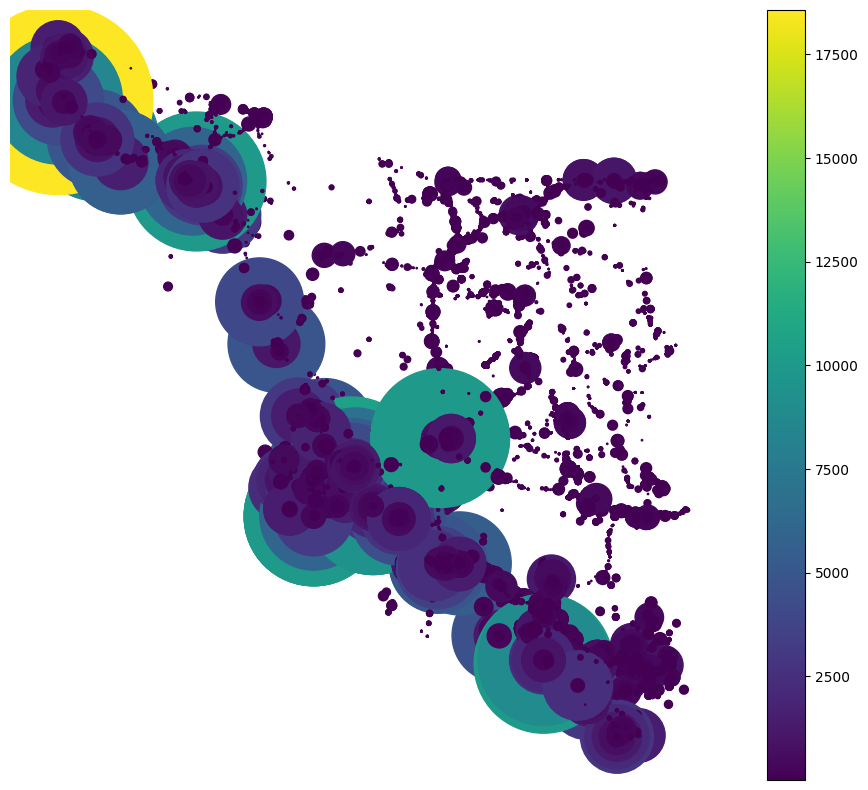

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="individualcount",
    cmap="viridis",
    markersize="individualcount",
    legend=True,
    ax=ax,
)

ax.set_axis_off()

In [9]:
import matplotlib.colors as colors
from matplotlib import colormaps  # new API

# Use the new colormap API (Matplotlib 3.7+)
cmap = colormaps["viridis"]

# Create a Folium-compatible gradient dictionary
viridis_gradient = {i / 10: colors.rgb2hex(cmap(i / 10)) for i in range(11)}
byGIS = (
    df.groupby(["decimallatitude", "decimallongitude"])["individualcount"]
    .sum()
    .reset_index()
)

In [17]:
m = folium.Map(
    location=[byGIS.decimallatitude.mean(), byGIS.decimallongitude.mean()], zoom_start=6
)
# marker_cluster = MarkerCluster().add_to(m)

""" for _, row in byGIS.iterrows():
    folium.CircleMarker(
        location=[row["decimallatitude"], row["decimallongitude"]],
        radius=1,
        popup=f"Total: {row['individualcount']:.2f}",
        color="black",
        fill=True,
        fill_opacity=0.3,
    ).add_to(m) """

HeatMap(
    byGIS[["decimallatitude", "decimallongitude"]],
    radius=5,
    # gradient=viridis_gradient,
    blur=5,
).add_to(m)
folium.LayerControl().add_to(m)
m.save("biodiversity_map.html")
m

In [ ]:
yearly_positions = (
    df.groupby(["decimallatitude", "decimallongitude", "year"])["individualcount"]
    .sum()
    .reset_index()
)

data = []
years = sorted(yearly_positions["year"].unique())

for y in years:
    subset = yearly_positions[yearly_positions["year"] == y]
    heat_data = subset[
        ["decimallatitude", "decimallongitude", "individualcount"]
    ].values.tolist()
    data.append(heat_data)

# Center map on mean location of data
center_lat = df["decimallatitude"].mean()
center_lon = df["decimallongitude"].mean()

m = folium.Map(
    location=[center_lat, center_lon], zoom_start=6, tiles="CartoDB positron"
)

hm = HeatMapWithTime(
    data=data,
    index=[str(y) for y in years],
    name="Heatmap over time",
    radius=15,
    auto_play=True,
    max_opacity=0.8,
    use_local_extrema=False,
    display_index=True,
)

hm.add_to(m)
folium.LayerControl().add_to(m)

m.save("evolution_map.html")
m

In [ ]:
users_positions = (
    df.groupby(["decimallatitude", "decimallongitude", "recordedby"])["individualcount"]
    .sum()
    .sort_values()
    .reset_index()
)

data = []
users = (
    df.groupby(["recordedby"])["individualcount"].sum().sort_values().index.to_list()
)

for u in users:
    subset = users_positions[users_positions["recordedby"] == u]
    heat_data = subset[
        ["decimallatitude", "decimallongitude", "individualcount"]
    ].values.tolist()
    data.append(heat_data)

# Center map on mean location of data
center_lat = df["decimallatitude"].mean()
center_lon = df["decimallongitude"].mean()

m = folium.Map(
    location=[center_lat, center_lon], zoom_start=6, tiles="CartoDB positron"
)

hm = HeatMapWithTime(
    data=data,
    index=[str(u) for u in users],
    name="Heatmap over time",
    radius=15,
    auto_play=True,
    max_opacity=0.8,
    use_local_extrema=False,
    display_index=True,
)

hm.add_to(m)
folium.LayerControl().add_to(m)

m.save("users_map.html")
m

In [ ]:
df.groupby(["fecha", "vernacularname"]).size().reset_index()

fecha           vernacularname  0
0      1952-11-01         American Kestrel  1
1      1952-11-01       Anna's Hummingbird  1
2      1952-11-01       Arizona Woodpecker  1
3      1952-11-01             Black Phoebe  1
4      1952-11-01            Black Vulture  1
...           ...                      ... ..
355051 2024-12-31    White-crowned Sparrow  7
355052 2024-12-31        White-winged Dove  8
355053 2024-12-31           Wilson's Snipe  1
355054 2024-12-31  Yellow-headed Blackbird  4
355055 2024-12-31    Yellow-rumped Warbler  7

[355056 rows x 3 columns]

# TODO

Usuarios
- Numero de especies difirentes
- Total de individuos contados
- Rango de fechas
- Total de observaciones
- Rango geografico de observaciones (como se podra calcular?)

Especies
- Numero total de observaciones
- Distribuion de individuos (o con solo el promedio y la dispersion bastara?)
- Rango geografico? (o solo con los municipios donde se observa bastara?)
- Rango temporal (sera relevante?)
- Numero que usuarios que la observaron (o proporcion del total)

Tambien un diagrama jerarquico que tambien muestre numero de observaciones por especie (treemap?)

Relacion usuarios-especies
- parallel set diagram
- Determinar si hay usuarios especialistas (que son los que observan las especies que nadie mas puede)